# Actividad 3

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

## Problema 1

 La serie de Taylor para la función seno ($\sin(x)$) centrada en $a=0$ .
 También conocida como la **serie de Maclaurin**, se expresa como:

$$
\sin(x) = \sum_{n=0}^{\infty} \frac{(-1)^n}{(2n+1)!}x^{2n+1} = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \dots
$$

- Encontrar la aproximación para $$x = \frac{\pi}{4}$$ cambiando el valor de tolerancia. ¿Qué puede concluir de la serie?

- Hallar el error relativo y porcentual.
- Grafique los valores asociados a la serie después de cada iteración.
- Repita para la serie:

$$
\ln(1 + x) = \sum_{n=1}^{\infty} \frac{(-1)^{n-1}}{n} x^n
$$

### Seno

In [27]:
#Definimos las funciones para los errores
error_absoluto = lambda valor_real, aproximacion: abs(valor_real - aproximacion)
error_relativo = lambda valor_real, aproximacion: abs((valor_real-aproximacion) / valor_real)
error_porcentual = lambda valor_real, aproximacion: abs((valor_real-aproximacion) / valor_real) * 100

In [28]:
def taylor_seno(x, maxiter = 100000, tolerancia = 1e-18):
    '''
    Calcula el seno de x usando la serie de Taylor con una presion de 1e-18
    Entrada:
        x: valor a calcular el seno
        maxiter(opcional): maximo de iteraciones. Por defecto maxiter=100000
        tolerancia(opcional): tolerancia para la convergencia. Por defecto tolerancia=1e-18
    Salida:
        sen(x): seno de x, lista de senos
    '''
    if x == 0: #Como en la serie se tomaria que se esta dividiendo por cero, utilizamos directamente el seno de 0 para evitar errores
        return 0, [0]

    #Como converge para todos los valores de x no hay restriccion

    seno = 0 #Inicializamos la suma
    lista_seno = [] #Creamos una lista vacia para añadir cada iteracion

    for n in range(maxiter+1):
        sin = (-1)** n * (x**(2 * n + 1)) / factorial(2 * n + 1)
        seno += sin
        lista_seno.append(seno)
        if abs(sin/seno) < tolerancia: #Se utiliza para saber si el termino que sumamos se considera irrelevante teniendo en cuenta la tolerancia
            return seno, lista_seno
    return 'maximo de iteraciones alcanzado', lista_seno #Si ya se alcanzaron el maximo de iteraciones y la serie no convergio

seno, lista = taylor_seno(np.pi/4)
lista



[0.7853981633974483,
 0.7046526512091675,
 0.7071430457793603,
 0.7071064695751781,
 0.7071067829368671,
 0.7071067811796194,
 0.7071067811865679,
 0.7071067811865475,
 0.7071067811865475,
 0.7071067811865475]

In [8]:
taylor_seno(np.pi)

(3.3280566969799443e-16,
 [3.141592653589793,
  -2.0261201264601763,
  0.5240439134171688,
  -0.07522061590362306,
  0.006925270707505135,
  -0.00044516023820921277,
  2.1142567558399565e-05,
  -7.727858894306387e-07,
  2.2419510716912098e-08,
  -5.28918280357759e-10,
  1.0348185903053497e-11,
  -1.7028581387855716e-13,
  2.736110705053739e-15,
  3.0354952506035265e-16,
  3.3311654048890173e-16,
  3.328027611925569e-16,
  3.3280569384172753e-16,
  3.328056695189652e-16,
  3.328056696991875e-16,
  3.328056696979873e-16,
  3.328056696979945e-16,
  3.3280566969799443e-16,
  3.3280566969799443e-16])

La serie converge para todos los valores reales de x, de esta forma no hay restricción en el dominio. Sin embargo, en el codigo se coloco una condición para 0 pues si se colocaba este valor en la funcion surgia un problema pues se estaria dividiendo por 0, así, como sabemos que $ \sin(0) = 0 $ entonces pusimos este valor.
Podemos notar que al aumentar el numero de terminos (maxiter) la aproximacion mejora.

In [9]:
print('Para x=pi/4 obtenemos: ')
print('\nEl error absoluto de sen(π/4) usando la serie de Taylor es: ', error_absoluto(np.sin(np.pi/4), seno))
print('\nEl error porcentual de sen(π/4) usando la serie de Taylor es: ', error_porcentual(np.sin(np.pi/4), seno))

Para x=pi/4 obtenemos: 

El error absoluto de sen(π/4) usando la serie de Taylor es:  1.1102230246251565e-16

El error porcentual de sen(π/4) usando la serie de Taylor es:  1.5700924586837748e-14


C:\Users\majoj\AppData\Local\Temp\ipykernel_11296\2033304584.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(x, y, 'g--' ,label='Seno de x', color='#d38008') #Grafica la funciom


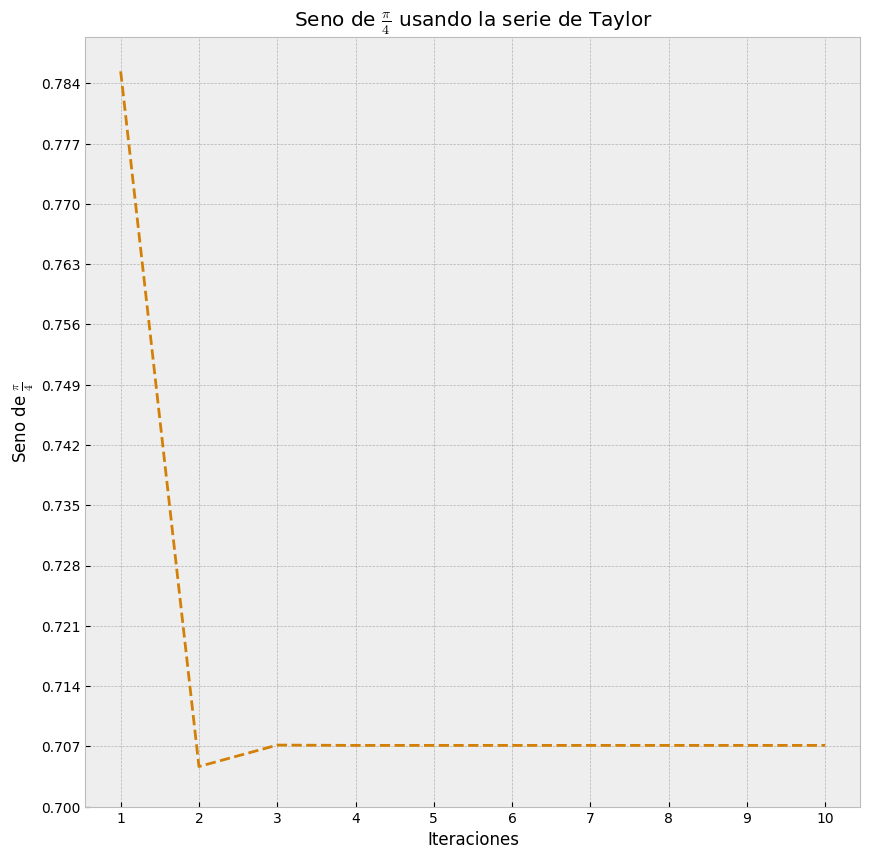

In [29]:
x = range(1, len(lista)+1)
y = lista

plt.style.use('bmh') #Cambiamos el estilo
plt.figure(figsize=(10, 10)) #Ajustamos el tamaño del grafico
plt.plot(x, y, 'g--' ,label='Seno de x', color='#d38008') #Grafica la funciom
plt.xticks(np.arange(1, 11, 1)); #Como es un inervalo pequeño que va de 1 en 1 se utiliza esta funcion para establecer que vaya de 1 en 1
plt.yticks(np.arange(0.7, 0.79, 0.007)); #para mejorar visualmente la grafica

plt.title(r'Seno de $\frac{\pi}{4}$ usando la serie de Taylor')
plt.xlabel('Iteraciones')
plt.ylabel(r'Seno de $\frac{\pi}{4}$')

plt.show()

### ln(1+x)

In [ ]:
def ln_1plusx(x, maxiter = 10000000, tolerancia = 1e-9):
    '''
    Calcula el ln(1 + x) usando la serie de Taylor con una presicion de 1e-18
    Entrada:
        x: Valor a calcular el ln(1 + x). Un valor -1< x <=1
        maxiter(opcional): maximo de iteraciones. Por defecto maxiter=100000
        tolerancia(opcional): tolerancia para la convergencia. Por defecto tolerancia=1e-18
    Salida:
        ln(1 + x): el valor de ln(1 + x), lista de los ln(1+x) de cada iteracion
    '''

    #Como la serie solo converge para los x entre -1 y 1 agregamos un condicional

    if x <= -1:
        raise ValueError ('ln(1 + x) no definido para x <= -1')
    if x>1:
        raise ValueError ('ln(1 + x) no definido para x > 1')
    if x == 0: #Como en la division que se hace presentaria un problema, se opta por definir de una vez el valor cuando x = 0
        return 0, [0]

    ln_suma = 0 #Inicializamos la suma
    lista_ln = [] #Lista vacia para agregar cada iteracion

    for n in range(1, maxiter+1):
        ln = (-1)**(n-1) * (x**n) / n
        ln_suma += ln
        lista_ln.append(ln_suma)
        if abs(ln/ln_suma) < tolerancia:
            return ln_suma, lista_ln
    return 'maximo de iteraciones alcanzado', lista_ln

ln_1plusx(0.5)

ln_1plusx(-0.5)

ln_1plusx(0.1)

ln_1plusx(-0.1)

ln_1plusx(0)


(0, [0])

Esta serie solo converge para $ -1 < x \leq 1 $ esto limita su uso permitiendo unicamente obtener valores para $ ( \ln(-1), ln (2) ] $, sin embargo, en x=1 x converge pero lentamente haciendo que con las iteraciones propuestas no se pueda llegar a un valor lo suficientemente aproximado que queremos. A su vez, si el valor de x es 0 se presenta el inconveniente de dividir por 0, para esto se hizo un condicional especial pues $\ln(1) = 0$ 

In [30]:
#calculamos el error absoluto y porcentual

ln, lista = ln_1plusx(0.5)
print('Para ln(1.5) tenemos que:')
print('\nEl error absoluto de ln(1 + x) usando la serie de Taylor para x = 0.5 es: ', error_absoluto(np.log(1.5), ln))
print('\nEl error porcentual de ln(1 + x) usando la serie de Taylor para x = 0.5 es: ', error_porcentual(np.log(1.5), ln))

print('\n<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<')

print('\nPara ln(0.5) tenemos que ')
ln, lista = ln_1plusx(-0.5)
print('\nEl error absoluto de ln(1 + x) usando la serie de Taylor para x = -0.5 es: ', error_absoluto(np.log(0.5), ln))
print('\nEl error porcentual de ln(1 + x) usando la serie de Taylor para x = -0.5 es: ', error_porcentual(np.log(0.5), ln))

print('\n<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<')

print('\nPara ln(1.01) tenemos que ')
ln, lista = ln_1plusx(0.1)
print('\nEl error absoluto de ln(1 + x) usando la serie de Taylor para x = -0.5 es: ', error_absoluto(np.log(1.1), ln))
print('\nEl error porcentual de ln(1 + x) usando la serie de Taylor para x = -0.5 es: ', error_porcentual(np.log(1.1), ln))

print('\n<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<')

print('\nPara ln(0.9) tenemos que ')
ln, lista = ln_1plusx(-0.1)
print('\nEl error absoluto de ln(1 + x) usando la serie de Taylor para x = -0.5 es: ', error_absoluto(np.log(0.9), ln))
print('\nEl error porcentual de ln(1 + x) usando la serie de Taylor para x = -0.5 es: ', error_porcentual(np.log(0.9), ln))

Para ln(1.5) tenemos que:

El error absoluto de ln(1 + x) usando la serie de Taylor para x = 0.5 es:  8.974027077002233e-11

El error porcentual de ln(1 + x) usando la serie de Taylor para x = 0.5 es:  2.2132674051470456e-08

<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

Para ln(0.5) tenemos que 

El error absoluto de ln(1 + x) usando la serie de Taylor para x = -0.5 es:  5.334231945042234e-10

El error porcentual de ln(1 + x) usando la serie de Taylor para x = -0.5 es:  7.69566997406392e-08

<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

Para ln(1.01) tenemos que 

El error absoluto de ln(1 + x) usando la serie de Taylor para x = -0.5 es:  8.328615574981768e-13

El error porcentual de ln(1 + x) usando la serie de Taylor para x = -0.5 es:  8.738432339631193e-10

<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

Para ln(0.9

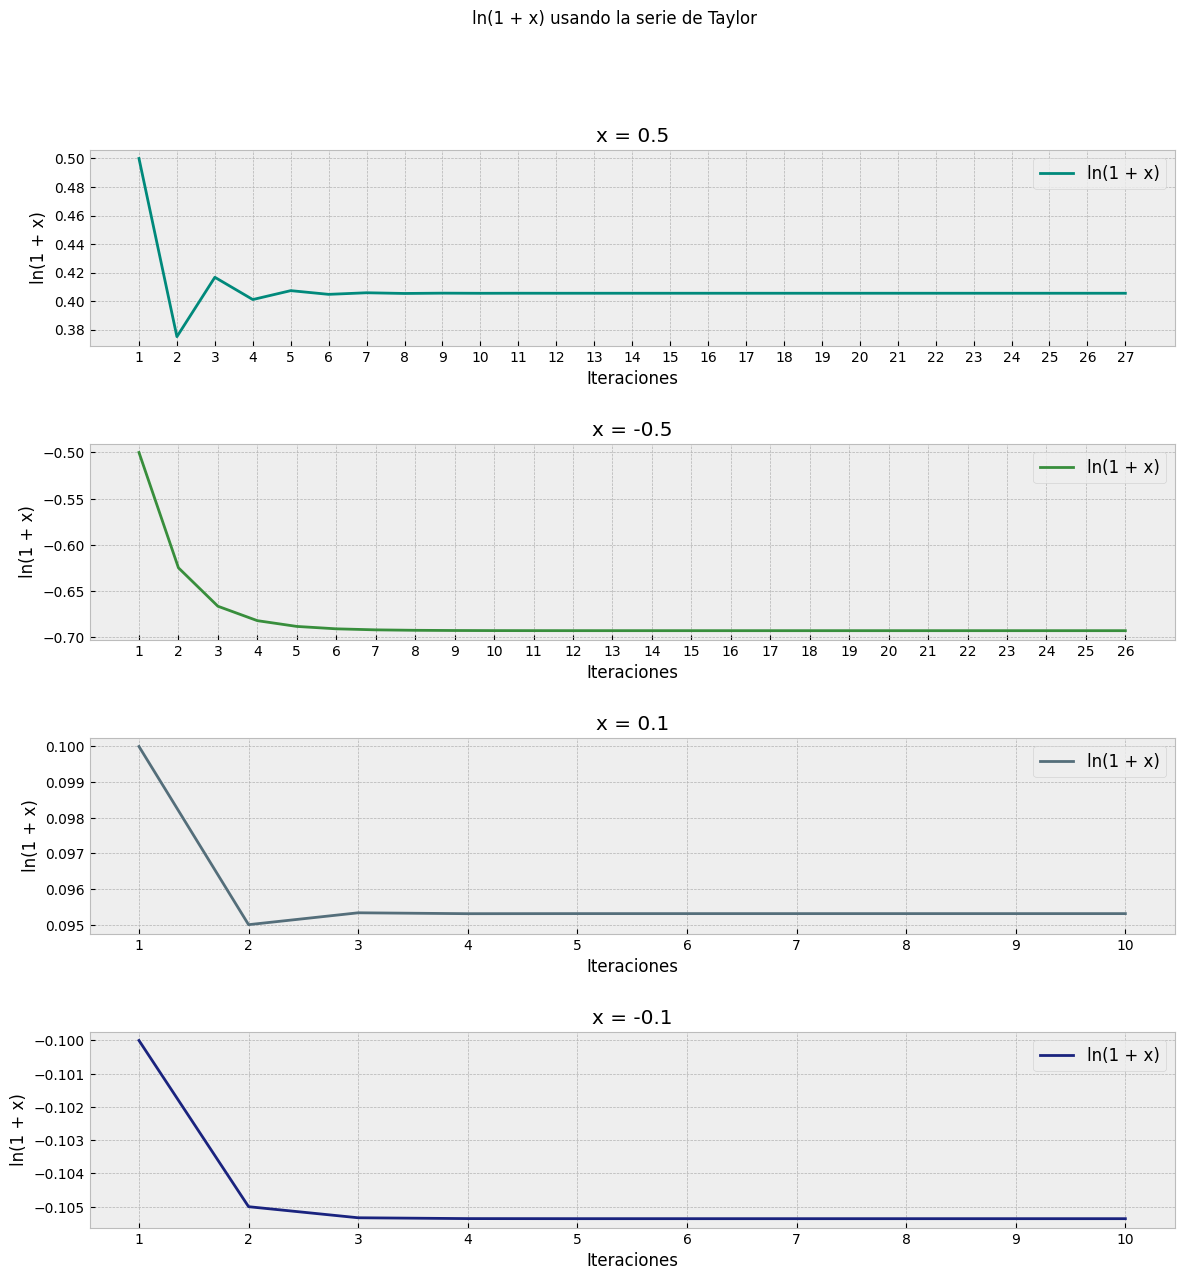

In [13]:
plt.style.use('bmh')
fig, axs = plt.subplots(4,1, figsize=(14, 14))
plt.suptitle('ln(1 + x) usando la serie de Taylor')
plt.subplots_adjust(hspace=0.5, wspace=0.5)

ln, lista = ln_1plusx(0.5)

ejex = range(1, len(lista)+1)
ejey = lista

axs[0].plot(ejex, ejey, color= '#00897b', label='ln(1 + x)')
axs[0].set_title('x = 0.5')
axs[0].set_xlabel('Iteraciones')
axs[0].set_ylabel('ln(1 + x)')
axs[0].set_xticks(np.arange(1, len(lista)+1, 1)); 

axs[0].legend(fontsize=12)


ln, lista = ln_1plusx(-0.5)

ejex = range(1, len(lista)+1)
ejey = lista

axs[1].plot(ejex, ejey, color= '#388e3c', label='ln(1 + x)')
axs[1].set_title('x = -0.5')
axs[1].set_xlabel('Iteraciones')
axs[1].set_ylabel('ln(1 + x)')
axs[1].set_xticks(np.arange(1, len(lista)+1, 1)); 

axs[1].legend(fontsize=12)

ln, lista = ln_1plusx(0.1)

ejex = range(1, len(lista)+1)
ejey = lista

axs[2].plot(ejex, ejey, color= '#546e7a', label='ln(1 + x)')
axs[2].set_title('x = 0.1')
axs[2].set_xlabel('Iteraciones')
axs[2].set_ylabel('ln(1 + x)')
axs[2].set_xticks(np.arange(1, len(lista)+1, 1)); 

axs[2].legend(fontsize=12)

ln, lista = ln_1plusx(-0.1)

ejex = range(1, len(lista)+1)
ejey = lista

axs[3].plot(ejex, ejey, color= '#1a237e', label='ln(1 + x)')
axs[3].set_title('x = -0.1')
axs[3].set_xlabel('Iteraciones')
axs[3].set_ylabel('ln(1 + x)')
axs[3].set_xticks(np.arange(1, len(lista)+1, 1)); 

axs[3].legend(fontsize=12)

## Problema 2

Serie de Taylor para $( \sqrt{1 + x} )$

La serie de Taylor para la función $( (1 + x)^\alpha )$, conocida como la **serie binomial**, centrada en $( \alpha = 0 )$ está dada por:

$
[
(1 + x)^\alpha = \sum_{n=0}^{\infty} \binom{\alpha}{n} x^n = 1 + \alpha x + \frac{\alpha(\alpha - 1)}{2!} x^2 + \frac{\alpha(\alpha - 1)(\alpha - 2)}{3!} x^3 + \cdots
]$

donde $( \binom{\alpha}{n} )$ es el **coeficiente binomial generalizado**.

Considerando el caso donde $( \alpha = \frac{1}{2} )$, tenemos:

$[
\sqrt{1 + x} = \sum_{n=0}^{\infty} \binom{1/2}{n} x^n = 1 + \frac{1}{2}x - \frac{1}{8}x^2 + \frac{1}{16}x^3 - \frac{5}{128}x^4 + \cdots
]$

---

a. Encontrar la aproximación para $( x = 0.5 )$

Calcula diferentes aproximaciones de la serie para \( x = 0.5 \), cambiando el número de términos incluidos en la suma.  
**¿Qué puedes concluir sobre la convergencia de la serie para este valor de $(x)$?**

---

b. Hallar el error relativo y porcentual

Utiliza como valor real:

$[
\sqrt{1 + 0.5} = \sqrt{1.5} \approx 1.224744871
]$

Compara este valor con cada aproximación para obtener el **error relativo** y el **error porcentual**.

---

c. Grafique los valores asociados a la serie después de cada iteración

Muestra cómo la serie se **acerca al valor real** a medida que se incluyen más términos.

---

d. Utilizando el criterio de tolerancia

Evalúa con **6 a 7 valores diferentes** y encuentra cuántos términos son necesarios para alcanzar una cierta **precisión deseada**.  
Realiza un gráfico de la evolución del sistema para visualizarlo.


In [ ]:
def serie_binomial_taylor(x, alfa, maxiter = 10000000, tolerancia = 1e-18):
    '''
    Calcula la serie binomial utilizando la serie de Taylor.
    Entrada:
        x: Valor a calcular la serie binomial. Seria(1+x)
        alfa: Valor de la potencia de la serie binomial.
        maxiter(opcional): maximo te iteraciones para que converga. 
                            Por defecto maxiter = 100000
        tolerancia(opcional): tolerancia para la convergencia.
                            Por defecto tolerancia = 1e-18
    Salida:
        serie_binomial: el valor de la serie binomial, lista de los valores de cada iteracion
    '''
    #Presenta problemas, pero si converge en x=0 asi que se define
    if x == 0:
        return 1, [1]
    
    coeficiente_generalizado = 1 
    suma = 1
    lista_serie = [1]

    for n in range(1, maxiter):

        coeficiente_generalizado *= (alfa - (n-1))
        binomio =  coeficiente_generalizado* (x**n) / factorial(n)
        suma += binomio
        lista_serie.append(suma)
        if abs(binomio/suma) < tolerancia:
            return suma, lista_serie
    return 'maximo de iteraciones alcanzado', lista_serie


In [24]:
serie_binomial_taylor(0.5, 0.5)

(1.2247448713915894,
 [1,
  1.25,
  1.21875,
  1.2265625,
  1.22412109375,
  1.2249755859375,
  1.2246551513671875,
  1.2247810363769531,
  1.2247298955917358,
  1.224751204252243,
  1.2247421480715275,
  1.2247460586950183,
  1.224744347797241,
  1.2247451045404887,
  1.2247447667086817,
  1.2247449187329948,
  1.224744849846978,
  1.2247448812508974,
  1.2247448668574343,
  1.224744873486003,
  1.22474487042029,
  1.2247448718436567,
  1.2247448711804971,
  1.224744871490452,
  1.2247448713451607,
  1.2247448714134477,
  1.224744871381274,
  1.2247448713964673,
  1.2247448713892777,
  1.2247448713926865,
  1.2247448713910674,
  1.2247448713918379,
  1.2247448713914706,
  1.2247448713916458,
  1.224744871391562,
  1.2247448713916023,
  1.2247448713915832,
  1.2247448713915923,
  1.2247448713915878,
  1.22474487139159,
  1.224744871391589,
  1.2247448713915894,
  1.2247448713915892,
  1.2247448713915894,
  1.2247448713915894,
  1.2247448713915894,
  1.2247448713915894,
  1.224744871391

In [25]:
print('Buscamos la aproximacion de la serie binomial para x = 0.5 y alfa = 0.5. \nVamos a variar el numero de terminos incluidos en la serie')
print('El valor exacto de la serie binomial es: ', np.sqrt(1.5))

print('\n<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<\n')

print('Para 10 terminos incluidos en la serie binomial tenemos que:\n')
binomio_1, lista_1 = serie_binomial_taylor(0.5, 0.5, 10)
if binomio_1 == 'maximo de iteraciones alcanzado':
    print('El maximo de iteraciones se alcanzo y no se obtuvo la convergencia')
else:
    print('La aproximacion de la serie binomial es: ', binomio_1)
    print('\nEl error absoluto de la serie binomial es: ', error_absoluto(np.sqrt(1.5), binomio_1))
    print('\nEl error relativo de la serie binomial es: ', error_relativo(np.sqrt(1.5), binomio_1))
    print('\nEl error porcentual de la serie binomial es: ', error_porcentual(np.sqrt(1.5), binomio_1))
print('La serie itero', len(lista_1), ' veces, la lista de la serie binomial es:\n ', lista_1)

print('\n<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<\n')

print('Para 25 terminos incluidos en la serie binomial tenemos que:\n')
binomio_2, lista_2 = serie_binomial_taylor(0.5, 0.5, 25)
if binomio_2 == 'maximo de iteraciones alcanzado':
    print('El maximo de iteraciones se alcanzo y no se obtuvo la convergencia')
else:
    print('La aproximacion de la serie binomial es: ', binomio_2)
    print('\nEl error absoluto de la serie binomial es: ', error_absoluto(np.sqrt(1.5), binomio_2))
    print('\nEl error relativo de la serie binomial es: ', error_relativo(np.sqrt(1.5), binomio_2))
    print('\nEl error porcentual de la serie binomial es: ', error_porcentual(np.sqrt(1.5), binomio_2))
print('La serie itero', len(lista_2), ' veces, la lista de la serie binomial es:\n ', lista_2)

print('\n<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<\n')

print('Para 50 terminos incluidos en la serie binomial tenemos que:\n')
binomio_3, lista_3 = serie_binomial_taylor(0.5, 0.5, 50)
if binomio_3 == 'maximo de iteraciones alcanzado':
    print('El maximo de iteraciones se alcanzo y no se obtuvo la convergencia')
else:
    print('La aproximacion de la serie binomial es: ', binomio_3)
    print('\nEl error absoluto de la serie binomial es: ', error_absoluto(np.sqrt(1.5), binomio_3))
    print('\nEl error relativo de la serie binomial es: ', error_relativo(np.sqrt(1.5), binomio_3))
    print('\nEl error porcentual de la serie binomial es: ', error_porcentual(np.sqrt(1.5), binomio_3))
print('La serie itero', len(lista_3), ' veces, la lista de la serie binomial es:\n ', lista_3)

print('\n<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<\n')

print('Para 51 terminos incluidos en la serie binomial tenemos que:\n')
binomio_4, lista_4 = serie_binomial_taylor(0.5, 0.5, 51)
if binomio_4 == 'maximo de iteraciones alcanzado':
    print('El maximo de iteraciones se alcanzo y no se obtuvo la convergencia')
else:
    print('La aproximacion de la serie binomial es: ', binomio_4)
    print('\nEl error absoluto de la serie binomial es: ', error_absoluto(np.sqrt(1.5), binomio_4))
    print('\nEl error relativo de la serie binomial es: ', error_relativo(np.sqrt(1.5), binomio_4))
    print('\nEl error porcentual de la serie binomial es: ', error_porcentual(np.sqrt(1.5), binomio_4))
print('La serie itero', len(lista_4), ' veces la lista de la serie binomial es:\n ', lista_4)

print('\n<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<\n')

print('Para 55 terminos incluidos en la serie binomial tenemos que:\n')
binomio_5, lista_5 = serie_binomial_taylor(0.5, 0.5, 55)
if binomio_5 == 'maximo de iteraciones alcanzado':
    print('El maximo de iteraciones se alcanzo y no se obtuvo la convergencia')

else:
    print('La aproximacion de la serie binomial es: ', binomio_5)
    print('\nEl error absoluto de la serie binomial es: ', error_absoluto(np.sqrt(1.5), binomio_5))
    print('\nEl error relativo de la serie binomial es: ', error_relativo(np.sqrt(1.5), binomio_5))
    print('\nEl error porcentual de la serie binomial es: ', error_porcentual(np.sqrt(1.5), binomio_5))
print('La serie itero', len(lista_5), ' veces la lista de la serie binomial es:\n ', lista_5)

print('\n<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<\n')

print('Para 75 terminos incluidos en la serie binomial tenemos que:\n')
binomio_6, lista_6 = serie_binomial_taylor(0.5, 0.5, 75)
if binomio_6 == 'maximo de iteraciones alcanzado':
    print('El maximo de iteraciones se alcanzo y no se obtuvo la convergencia')
else:
    print('La aproximacion de la serie binomial es: ', binomio_6)
    print('\nEl error absoluto de la serie binomial es: ', error_absoluto(np.sqrt(1.5), binomio_6))
    print('\nEl error relativo de la serie binomial es: ', error_relativo(np.sqrt(1.5), binomio_6))
    print('\nEl error porcentual de la serie binomial es: ', error_porcentual(np.sqrt(1.5), binomio_6))
print('La serie itero', len(lista_6), ' veces la lista de la serie binomial es:\n ', lista_6)

print('\n<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<\n')

print('Para 100 terminos incluidos en la serie binomial tenemos que:\n')
binomio_7, lista_7 = serie_binomial_taylor(0.5, 0.5, 100)
if binomio_7 == 'maximo de iteraciones alcanzado':
    print('El maximo de iteraciones se alcanzo y no se obtuvo la convergencia')
else:
    print('La aproximacion de la serie binomial es: ', binomio_7)
    print('\nEl error absoluto de la serie binomial es: ', error_absoluto(np.sqrt(1.5), binomio_7))
    print('\nEl error relativo de la serie binomial es: ', error_relativo(np.sqrt(1.5), binomio_7))
    print('\nEl error porcentual de la serie binomial es: ', error_porcentual(np.sqrt(1.5), binomio_7))
print('La serie itero', len(lista_7), ' veces la lista de la serie binomial es:\n ', lista_7)

print('\n<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<\n')

print('Para 700 terminos incluidos en la serie binomial tenemos que:\n')
binomio_8, lista_8 = serie_binomial_taylor(0.5, 0.5, 700)
if binomio_8 == 'maximo de iteraciones alcanzado':
    print('El maximo de iteraciones se alcanzo y no se obtuvo la convergencia')
else:
    print('La aproximacion de la serie binomial es: ', binomio_8)
    print('\nEl error absoluto de la serie binomial es: ', error_absoluto(np.sqrt(1.5), binomio_8))
    print('\nEl error relativo de la serie binomial es: ', error_relativo(np.sqrt(1.5), binomio_8))
    print('\nEl error porcentual de la serie binomial es: ', error_porcentual(np.sqrt(1.5), binomio_8))
print('La serie itero', len(lista_8), ' veces la lista de la serie binomial es:\n ', lista_8)

print('\n<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<\n')

print('Para 2000 terminos incluidos en la serie binomial tenemos que:\n')
binomio_9, lista_9 = serie_binomial_taylor(0.5, 0.5, 2000)
if binomio_9 == 'maximo de iteraciones alcanzado':
    print('El maximo de iteraciones se alcanzo y no se obtuvo la convergencia')
else:
    print('La aproximacion de la serie binomial es: ', binomio_9)
    print('\nEl error absoluto de la serie binomial es: ', error_absoluto(np.sqrt(1.5), binomio_9))
    print('\nEl error relativo de la serie binomial es: ', error_relativo(np.sqrt(1.5), binomio_9))
    print('\nEl error porcentual de la serie binomial es: ', error_porcentual(np.sqrt(1.5), binomio_9))
print('La serie itero', len(lista_9), ' veces la lista de la serie binomial es:\n ', lista_9)

print('\n<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<\n')

print('Para 10000000 terminos incluidos en la serie binomial tenemos que:\n')
binomio_10, lista_10 = serie_binomial_taylor(0.5, 0.5)
if binomio_10 == 'maximo de iteraciones alcanzado':
    print('El maximo de iteraciones se alcanzo y no se obtuvo la convergencia')
else:
    print('La aproximacion de la serie binomial es: ', binomio_10)
    print('\nEl error absoluto de la serie binomial es: ', error_absoluto(np.sqrt(1.5), binomio_10))
    print('\nEl error relativo de la serie binomial es: ', error_relativo(np.sqrt(1.5), binomio_10))
    print('\nEl error porcentual de la serie binomial es: ', error_porcentual(np.sqrt(1.5), binomio_10))
print('La serie itero', len(lista_10), ' veces la lista de la serie binomial es:\n ', lista_10)

Buscamos la aproximacion de la serie binomial para x = 0.5 y alfa = 0.5. 
Vamos a variar el numero de terminos incluidos en la serie
El valor exacto de la serie binomial es:  1.224744871391589

<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

Para 10 terminos incluidos en la serie binomial tenemos que:

El maximo de iteraciones se alcanzo y no se obtuvo la convergencia
La serie itero 10  veces, la lista de la serie binomial es:
  [1, 1.25, 1.21875, 1.2265625, 1.22412109375, 1.2249755859375, 1.2246551513671875, 1.2247810363769531, 1.2247298955917358, 1.224751204252243]

<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

Para 25 terminos incluidos en la serie binomial tenemos que:

El maximo de iteraciones se alcanzo y no se obtuvo la convergencia
La serie itero 25  veces, la lista de la serie binomial es:
  [1, 1.25, 1.21875, 1.2265625, 1.22412109375, 1.2249755859375, 1.2246551513671875, 1.2247810363769531, 1.2247298955917358, 1.2247512042

Como se puede observar a partir de la suma del 51 termino, para la tolerancia predeterminada, la serie converge y es lo suficientemente cercano como para que la suma de los siguientes terminos se considere despreciable. A partir del dato 51 todos iteran 51 veces utilizandolo como criterio de corte

1.224744871391589


C:\Users\majoj\AppData\Local\Temp\ipykernel_11296\3000866091.py:64: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[2,1].legend(fontsize=12)


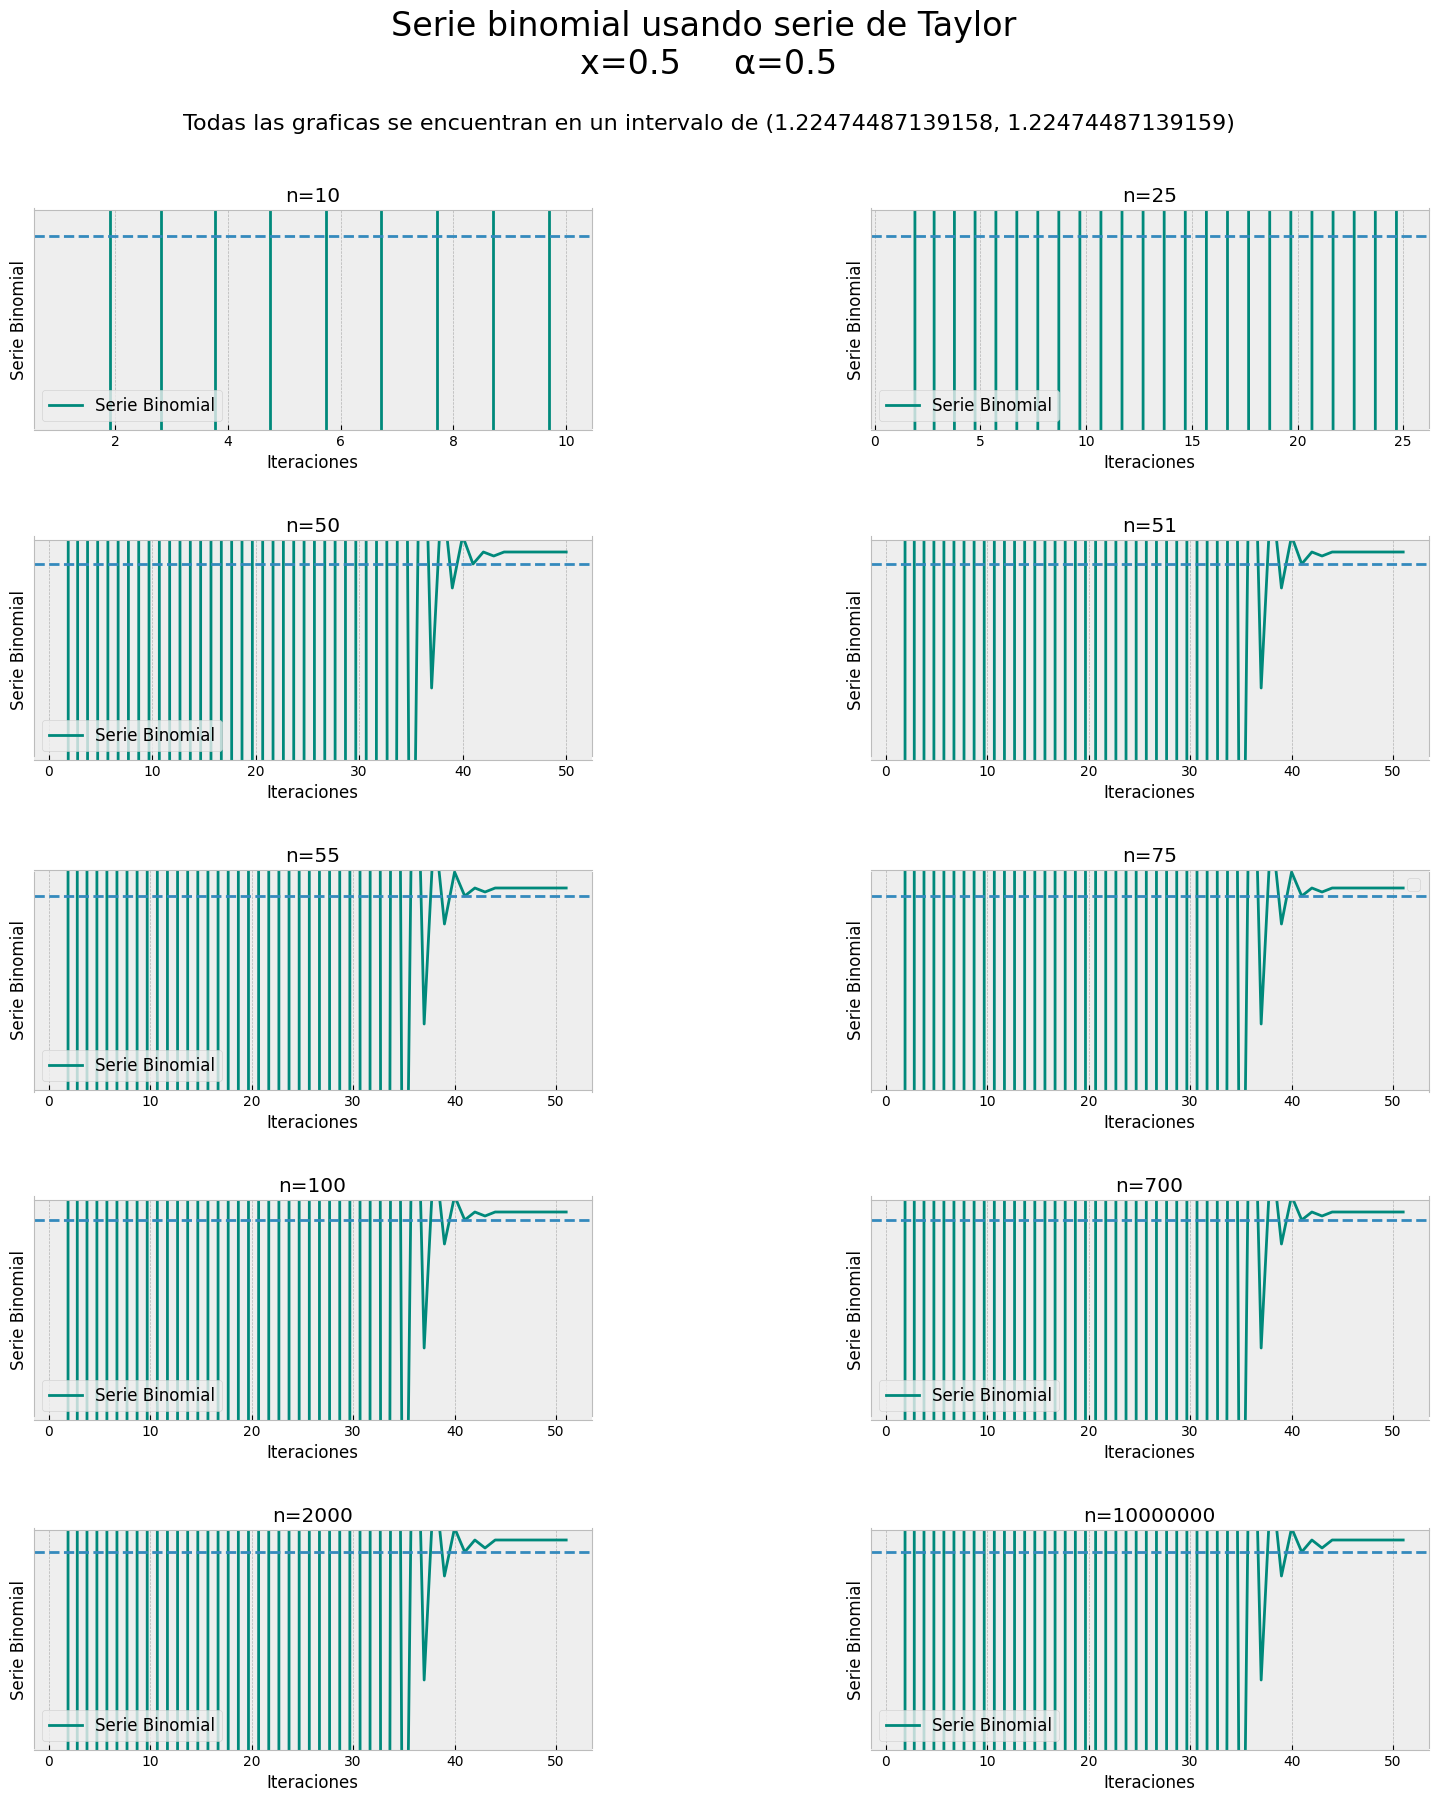

In [ ]:
valor = (np.sqrt(1.5))
print(valor)

plt.style.use('bmh')
fig, axs = plt.subplots(5,2, figsize=(18, 20))
plt.suptitle('Serie binomial usando serie de Taylor \nx=0.5     α=0.5', fontsize=24) #Titulo general
fig.text(0.5, 0.92, 'Todas las graficas se encuentran en un intervalo de (1.22474487139158, 1.22474487139159)', ha='center', fontsize=16)
plt.subplots_adjust(hspace=0.5, wspace=0.5)


ejex = range(1, len(lista_1)+1)
ejey = lista_1
axs[0,0].plot(ejex, ejey, color= '#00897b', label='Serie Binomial')
axs[0,0].set_title('n=10')
axs[0,0].set_xlabel('Iteraciones')
axs[0,0].set_ylabel('Serie Binomial')
axs[0,0].axhline(y = valor, linestyle = '--')
axs[0,0].set_ylim(1.22474487139158,1.22474487139159)

axs[0,0].legend(fontsize=12)

ejex = range(1, len(lista_2)+1)
ejey = lista_2
axs[0,1].plot(ejex, ejey, color= '#00897b', label='Serie Binomial')
axs[0,1].set_title('n=25')
axs[0,1].set_xlabel('Iteraciones')
axs[0,1].set_ylabel('Serie Binomial')
axs[0,1].axhline(y = valor, linestyle = '--')
axs[0,1].set_ylim(1.22474487139158,1.22474487139159)

axs[0,1].legend(fontsize=12)

ejex = range(1, len(lista_3)+1)
ejey = lista_3
axs[1,0].plot(ejex, ejey, color= '#00897b', label='Serie Binomial')
axs[1,0].set_title('n=50')
axs[1,0].set_xlabel('Iteraciones')
axs[1,0].set_ylabel('Serie Binomial')
axs[1,0].axhline(y = valor, linestyle = '--')
axs[1,0].set_ylim(1.22474487139158,1.22474487139159)

axs[1,0].legend(fontsize=12)

ejex = range(1, len(lista_4)+1)
ejey = lista_4
axs[1,1].plot(ejex, ejey, color= '#00897b', label='Serie Binomial')
axs[1,1].set_title('n=51')
axs[1,1].set_xlabel('Iteraciones')
axs[1,1].set_ylabel('Serie Binomial')
axs[1,1].axhline(y = valor, linestyle = '--')
axs[1,1].set_ylim(1.22474487139158,1.22474487139159)

axs[0,1].legend(fontsize=12)

ejex = range(1, len(lista_5)+1)
ejey = lista_5
axs[2,0].plot(ejex, ejey, color= '#00897b', label='Serie Binomial')
axs[2,0].set_title('n=55')
axs[2,0].set_xlabel('Iteraciones')
axs[2,0].set_ylabel('Serie Binomial')
axs[2,0].axhline(y = valor, linestyle = '--')
axs[2,0].set_ylim(1.22474487139158,1.22474487139159)

axs[2,1].legend(fontsize=12)

ejex = range(1, len(lista_6)+1)

axs[2,1].plot(ejex, ejey, color= '#00897b', label='Serie Binomial')
axs[2,1].set_title('n=75')
axs[2,1].set_xlabel('Iteraciones')
axs[2,1].set_ylabel('Serie Binomial')
axs[2,1].axhline(y = valor, linestyle = '--')
axs[2,1].set_ylim(1.22474487139158,1.22474487139159)

axs[2,0].legend(fontsize=12)

ejex = range(1, len(lista_7)+1)
ejey = lista_7
axs[3,0].plot(ejex, ejey, color= '#00897b', label='Serie Binomial')
axs[3,0].set_title('n=100')
axs[3,0].set_xlabel('Iteraciones')
axs[3,0].set_ylabel('Serie Binomial')
axs[3,0].axhline(y = valor, linestyle = '--')
axs[3,0].set_ylim(1.22474487139158,1.22474487139159)

axs[3,0].legend(fontsize=12)

ejex = range(1, len(lista_8)+1)
ejey = lista_8
axs[3,1].plot(ejex, ejey, color= '#00897b', label='Serie Binomial')
axs[3,1].set_title('n=700')
axs[3,1].set_xlabel('Iteraciones')
axs[3,1].set_ylabel('Serie Binomial')
axs[3,1].axhline(y = valor, linestyle = '--')
axs[3,1].set_ylim(1.22474487139158,1.22474487139159)

axs[3,1].legend(fontsize=12)

ejex = range(1, len(lista_9)+1)
ejey = lista_9
axs[4,0].plot(ejex, ejey, color= '#00897b', label='Serie Binomial')
axs[4,0].set_title('n=2000')
axs[4,0].set_xlabel('Iteraciones')
axs[4,0].set_ylabel('Serie Binomial')
axs[4,0].axhline(y = valor, linestyle = '--')
axs[4,0].set_ylim(1.22474487139158,1.22474487139159)

axs[4,0].legend(fontsize=12)

ejex = range(1, len(lista_10)+1)
ejey = lista_10
axs[4,1].plot(ejex, ejey, color= '#00897b', label='Serie Binomial')
axs[4,1].set_title('n=10000000')
axs[4,1].set_xlabel('Iteraciones')
axs[4,1].set_ylabel('Serie Binomial')
axs[4,1].axhline(y = valor, linestyle = '--')
axs[4,1].set_ylim(1.22474487139158,1.22474487139159)

axs[4,1].legend(fontsize=12)

